<h3>Rename and Resizing Image</h3>

In [17]:
import cv2
import csv
import glob
from PIL import Image
import os

In [9]:
#read image
img = cv2.imread("F:/beenus/ResearchMethod/data_bersih/0/1.png")
print('Image Width is',img.shape[1])
print('Image Height is',img.shape[0])


Image Width is 44
Image Height is 36


In [14]:
output = cv2.resize(img, (28,28))

In [15]:
cv2.imwrite('F:/beenus/ResearchMethod/data_bersih/0/testing.png',output) 

True

In [28]:
path = "F:/beenus/ResearchMethod/data_bersih/0"
files = os.listdir(path=path)
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.png'])))

In [42]:
path = "F:/beenus/ResearchMethod/data_bersih/9"
for index, file in enumerate(files):
    path_file = "F:/beenus/ResearchMethod/data_bersih/9/" + str(index)+ ".png"
    img = cv2.imread(path_file)
    output = cv2.resize(img, (28,28))
    cv2.imwrite("F:/beenus/ResearchMethod/data_bersih/9_resize/" + str(index) + ".png",output) 


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


<h3>Generate Dataset</h3>

In [397]:
import cv2
import csv
import glob
header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset_baru_2.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("F:/beenus/ResearchMethod/data_bersih/"+ str(label) + "_resize_bersih/" + "*.png")
    for img_path in dirList:
        im = cv2.imread(img_path)
        img_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        img_gray = cv2.GaussianBlur(img_gray, (1, 1), 0 )
        roi = cv2.resize(img_gray, (28,28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)
        rows,cols = roi.shape

        #add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k > 197:
                    k=1
                else:
                    k = 0
                data.append(k)
        with open('dataset_baru_2.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

<h3>Load Dataset</h3>

In [15]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset_baru.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
118,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
554,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
590,6,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,1,1,1,1
341,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
366,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
728,9,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
267,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
325,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
X = data.drop(['label'],axis = 1)
y = data['label']
y.value_counts()

0    206
2    172
8     71
3     69
6     55
9     53
4     48
5     44
1     36
7     17
Name: label, dtype: int64

0


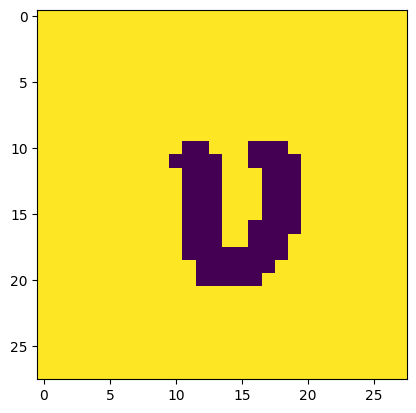

In [17]:
import matplotlib.pyplot as plt

import cv2
idx = 200
img = X.loc[idx].values.reshape(28,28)
print(y[idx])
plt.imshow(img)

<h3>Testing Using SVC</h3>

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2)


In [16]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=2)
classifier.fit(train_x, train_y)
joblib.dump(classifier, "model/digit_recognizier_2")

['model/digit_recognizier_2']

In [17]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.9219088937093276


<h3>Check Image</h3>

In [105]:
import cv2
  
originalImage = cv2.imread('F:/beenus/ResearchMethod/data_bersih/0_resize/2.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 1, 1, cv2.THRESH_BINARY)
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.imshow('Original image',originalImage)
cv2.imshow('Gray image', grayImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>Splitting Dataset to Train and Test (CSV)</h3>

In [356]:
train,test = train_test_split(data, test_size=0.2, random_state=0)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

<h3>Live Prediction</h3>

In [4]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
from tensorflow import keras
loaded_2 = keras.models.load_model("F:/beenus/ResearchMethod/model_1")
# model=joblib.load("F:/beenus/ResearchMethod/model/digit_recognizier_2")
image_folder="F:/beenus/ResearchMethod/img"
 
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(image_folder+"img.png")
   im = cv2.imread(image_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
#    X = np.array([])
   X = []
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
        #    np.append(X,k)
#    print(X)
   X = np.array(X)
   X = X.reshape(-1,28,28,1)

   predictions  =loaded_2.predict([X])
   prediction_classes = np.argmax(predictions, axis = 1)
#    print("Prediction:",predictions[0])
   print("Prediction:",prediction_classes)
#    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   cv2.putText(im, "Prediction is: "+str(prediction_classes), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)

   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(3000)

   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 75ms/step
Prediction: [6]
1/1 [==============================] - 0s 12ms/step
Prediction: [6]
1/1 [==============================] - 0s 11ms/step
Prediction: [5]
1/1 [==============================] - 0s 12ms/step
Prediction: [5]
1/1 [==============================] - 0s 14ms/step
Prediction: [6]
1/1 [==============================] - 0s 12ms/step
Prediction: [6]
1/1 [==============================] - 0s 12ms/step
Prediction: [9]
1/1 [==============================] - 0s 11ms/step
Prediction: [0]
1/1 [==============================] - 0s 11ms/step
Prediction: [0]
1/1 [==============================] - 0s 12ms/step
Prediction: [4]
1/1 [==============================] - 0s 13ms/step
Prediction: [4]
1/1 [==============================] - 0s 11ms/step
Prediction: [1]
1/1 [==============================] - 0s 12ms/step
Prediction: [9]
1/1 [==============================] - 0s 12ms/step
Prediction: [1]
1/1 [==============================] - 0s 12ms/s

KeyboardInterrupt: 